In [2]:
import pandas as pd
import numpy as np

In [7]:
gene_tpm = pd.read_table("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct",skiprows=2)

In [147]:
gene_tpm[1:5]

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
1,ENSG00000227232.4,WASH7P,21.40000,11.03000,16.75000,8.1720,7.65800,9.372,10.0800,13.56000,...,3.92600,13.13000,5.53700,5.78900,8.439,7.84300,12.39000,12.53000,8.02700,12.76000
2,ENSG00000243485.2,MIR1302-11,0.16020,0.06433,0.04674,0.0000,0.05864,0.000,0.1367,0.20790,...,0.08008,0.03607,0.00000,0.10590,0.000,0.06432,0.05388,0.00000,0.04756,0.05367
3,ENSG00000237613.2,FAM138A,0.05045,0.00000,0.02945,0.0326,0.00000,0.000,0.0861,0.13100,...,0.00000,0.06818,0.07309,0.03336,0.000,0.08105,0.00000,0.05304,0.02996,0.03381
4,ENSG00000268020.2,OR4G4P,0.00000,0.00000,0.00000,0.0000,0.00000,0.000,0.1108,0.05619,...,0.00000,0.00000,0.00000,0.00000,0.000,0.00000,0.08739,0.00000,0.00000,0.04353


In [15]:
samples = pd.read_table("GTEx_v7_Annotations_SampleAttributesDS-blood_lung-ONLY.txt")

In [145]:
samples[1:5]

,SUBJID,SAMPID,SMTS,SMTSD
1,GTEX-111YS,GTEX-111YS-0626-SM-5GZXV,Lung,Lung
2,GTEX-1122O,GTEX-1122O-0005-SM-5O99J,Blood,Whole Blood
3,GTEX-1122O,GTEX-1122O-0126-SM-5GICA,Lung,Lung
4,GTEX-1128S,GTEX-1128S-0005-SM-5P9HI,Blood,Whole Blood


In [49]:
samples[samples.SMTS == "Lung"].SAMPID.values[1:5]
# [["Name", "Description"] + list(samples[samples.SMTS == "Lung"].SAMPID.values)]

array(['GTEX-1122O-0126-SM-5GICA', 'GTEX-1128S-0726-SM-5N9D6',
       'GTEX-117YW-0526-SM-5H11C', 'GTEX-11DXX-0626-SM-5Q5AG'],
      dtype=object)

In [51]:
lung_gene_tpm = gene_tpm[["Name", "Description"] + list(samples[samples.SMTS == "Lung"].SAMPID.values)]
blood_gene_tpm = gene_tpm[["Name", "Description"] + list(samples[samples.SMTS == "Blood"].SAMPID.values)]

In [52]:
blood_gene_tpm.to_csv("blood_gene_tpm.txt",sep= '\t')
lung_gene_tpm.to_csv("lung_gene_tpm.txt",sep= '\t')

In [133]:
temp = lung_gene_tpm.iloc[1:200,2:].transpose().corr().abs()

In [137]:
np.fill_diagonal(temp.values, 0)

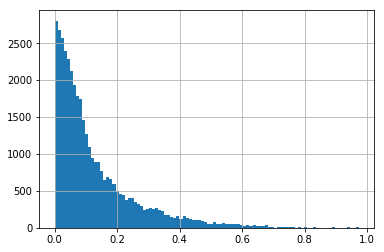

In [141]:
temp.stack().hist(bins=100)

In [144]:
temp.stack().describe(percentiles = [0.2,0.4,0.5,0.6,0.8,0.9])

count    38419.000000
mean         0.127298
std          0.133223
min          0.000000
20%          0.027871
40%          0.060827
50%          0.081341
60%          0.107263
80%          0.204333
90%          0.311681
max          0.974524
dtype: float64